# Report01 - 交通事故理赔审核预测

* 沈键
* 2021200082

## 1. 任务简介

&ensp;&ensp;&ensp;&ensp;在交通摩擦（事故）发生后，理赔员会前往现场勘察、采集信息，这些信息往往影响着车主是否能够得到保险公司的理赔。训练集数据包括理赔人员在现场对该事故方采集的36条信息，信息已经被编码，以及该事故方最终是否获得理赔。我们的任务是根据这36条信息预测该事故方没有被理赔的概率。

## 2. 数据分析

&ensp;&ensp;&ensp;&ensp;想来分析一下所给的数据特征。使用pandas读入train.csv文件并显示前几行：

In [1]:
import pandas as pd

train_df = pd.read_csv("./data/train.csv")
train_df.head(10)

CaseId  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  ...  Q28  Q29  Q30  Q31  Q32  \
0       1   0   0   0   0   0   0   0   0   0  ...    0    0    0    0    0   
1       2   0   0   0   0   0   0   0   0   0  ...    0    1    1    1    1   
2       3   0   0   0   0   0   0   0   1   0  ...    1    2    2    2    1   
3       4   0   0   0   0   0   0   0   0   0  ...    1    3    2    3    1   
4       5   0   0   0   0   0   0   0   0   0  ...    1    4    2    4    1   
5       6   0   0   0   0   0   0   0   0   0  ...    1    2    3    5    1   
6       7   0   0   0   0   0   0   0   0   0  ...    0    3    1    6    1   
7       8   0   0   0   0   0   0   0   0   0  ...    1    3    1    3    1   
8       9   0   0   0   0   0   0   0   2   0  ...    0    2    1    2    1   
9      10   0   0   0   0   0   0   0   0   0  ...    0    2    1    7    1   

   Q33  Q34  Q35  Q36  Evaluation  
0    0    0    0    0           0  
1    0    0    0    0           0  
2    0    0    0    0           0  
3    0    0    1    1           0  
4    0    0    1    1           0  
5    0    0    0    0           0  
6    0    0    1    1           1  
7    0    0    1    1           1  
8    0    0    0    0           0  
9    0    0    0    0           0  

[10 rows x 38 columns]

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 38 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   CaseId      200000 non-null  int64
 1   Q1          200000 non-null  int64
 2   Q2          200000 non-null  int64
 3   Q3          200000 non-null  int64
 4   Q4          200000 non-null  int64
 5   Q5          200000 non-null  int64
 6   Q6          200000 non-null  int64
 7   Q7          200000 non-null  int64
 8   Q8          200000 non-null  int64
 9   Q9          200000 non-null  int64
 10  Q10         200000 non-null  int64
 11  Q11         200000 non-null  int64
 12  Q12         200000 non-null  int64
 13  Q13         200000 non-null  int64
 14  Q14         200000 non-null  int64
 15  Q15         200000 non-null  int64
 16  Q16         200000 non-null  int64
 17  Q17         200000 non-null  int64
 18  Q18         200000 non-null  int64
 19  Q19         200000 non-null  int64
 20  Q20 

train.csv给了20w条数据，第一列为交通事故案例的Id，其意义不大，可以舍去，第2列至第37列为理赔人员在现场对该事故方采集的36条信息，并已经被编码，用整型表示，最后一列表示是否理赔。上图中显示了各项信息分数的分布。

array([[<AxesSubplot:title={'center':'Q1'}>,
        <AxesSubplot:title={'center':'Q2'}>,
        <AxesSubplot:title={'center':'Q3'}>,
        <AxesSubplot:title={'center':'Q4'}>,
        <AxesSubplot:title={'center':'Q5'}>,
        <AxesSubplot:title={'center':'Q6'}>],
       [<AxesSubplot:title={'center':'Q7'}>,
        <AxesSubplot:title={'center':'Q8'}>,
        <AxesSubplot:title={'center':'Q9'}>,
        <AxesSubplot:title={'center':'Q10'}>,
        <AxesSubplot:title={'center':'Q11'}>,
        <AxesSubplot:title={'center':'Q12'}>],
       [<AxesSubplot:title={'center':'Q13'}>,
        <AxesSubplot:title={'center':'Q14'}>,
        <AxesSubplot:title={'center':'Q15'}>,
        <AxesSubplot:title={'center':'Q16'}>,
        <AxesSubplot:title={'center':'Q17'}>,
        <AxesSubplot:title={'center':'Q18'}>],
       [<AxesSubplot:title={'center':'Q19'}>,
        <AxesSubplot:title={'center':'Q20'}>,
        <AxesSubplot:title={'center':'Q21'}>,
        <AxesSubplot:title={'center':'Q2

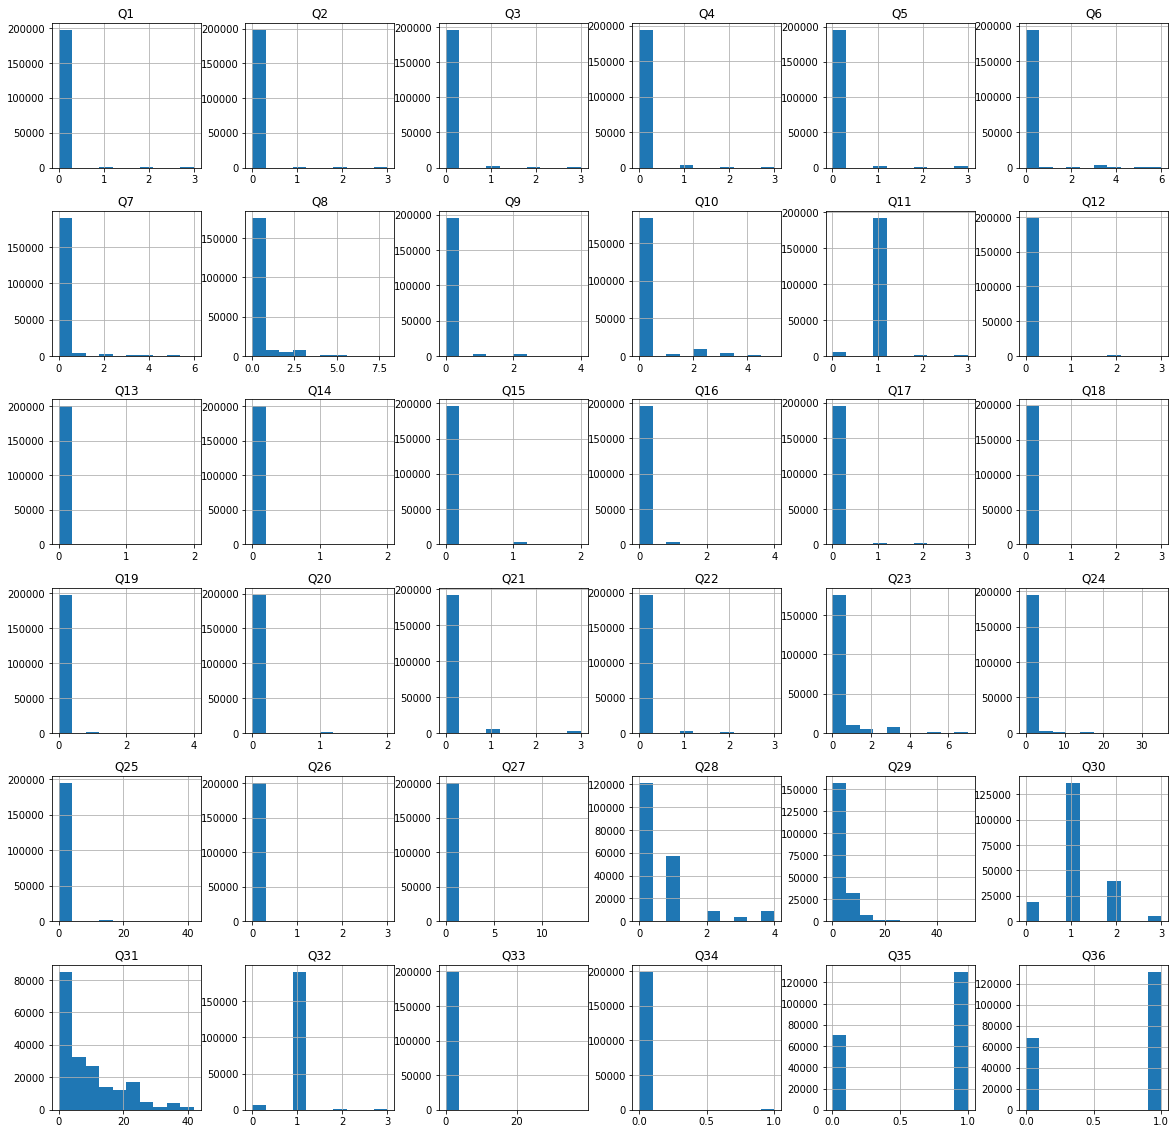

In [3]:
train_df.iloc[:, 1:37].hist(figsize=(20, 20))

这是一个二分类的问题，并且数据集较大，当特征量并不多，考虑使用全连接神经网络解决。

## 3. 全连接神经网络

&ensp;&ensp;&ensp;&ensp;全连接神经网络，顾名思义，就是相邻两层之间任意两个节点之间都有连接。全连接神经网络是最为普通的一种模型（比如和CNN相比），由于是全连接，所以会有更多的权重值和连接，因此也意味着占用更多的内存和计算。其网络结构如下图所示：

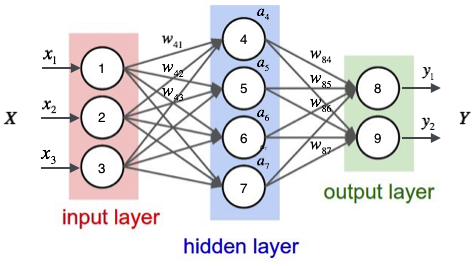

其由输入层，隐藏层和输出层组成。当给定输入后，输入层通过一组线性关系公式传给隐藏层，到达隐藏层后，又通过一组线性关系输出给输出层，最后由输出层输出最终的预测值。其示意图如下：

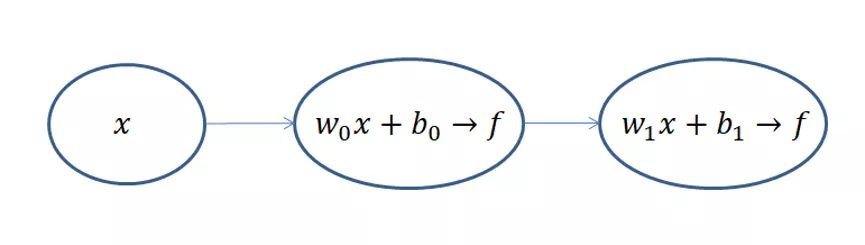

其中$x$表示前一层传入的输出值，$w$表示系数矩阵，$b$表示偏置项。

但光靠上面的结构，其输入值和输出值之间仍然保持线性关系，与普通的逻辑回归模型可以证明是等价的。为了增加非线性特性，数据在从隐藏层和输出层输出前，会通过一层激活函数的计算，由此引入非线性特性，增加模型的表达能力。常见的激活函数有：

Sigmoid激活函数：

$$
\sigma(x)=\frac{1}{1+e^{-x}}
$$

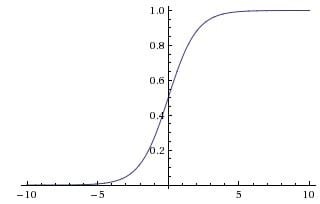

tanh激活函数：

$$
\tanh (x)=2 \sigma(2 x)-1
$$

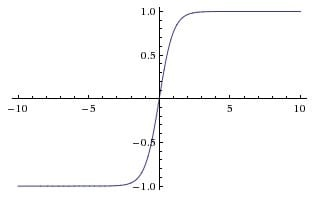

ReLU激活函数:

$$
\operatorname{Re} L U(x)=\max (0, x)
$$

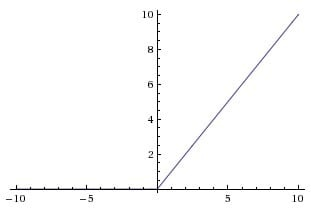

如果各层之间的系数矩阵和偏置项已知的话，给定输入值，就可以求出输出值来，这个过程叫做前向传播。但实际情况是，在训练前，模型的系数矩阵和偏置项的中的值是随机的，此时需要根据预测结果与真实值的误差大小修正模型的系数矩阵和偏置项，这一过程称为反向传播。首先，我们定义一个损失函数，用于评估预测结果与真实值之间的误差，本次任务中选用的损失函数为Pytorch中提供的交叉熵函数(CrossEntropyLoss)，其由log_softmax和nll_loss实现。log_softmax为对数softmax函数，其计算公式为：

$$
\text { log_softmax }=\log \left(\frac{\exp \left(x_{i}\right)}{\sum_{j} \exp \left(x_{j}\right)}\right)
$$

nll_loss的计算方式就是将上面输出的值与对应的Label中的类别拿出来去掉负号，用计算公式表示为：

$$
\text { nll_loss }(x, \text { class })=-x[\text { class }]
$$

再计算出了预测值与输出值之间的损失函数，开始反向传播，逐层求出目标函数对各神经元权值的偏导数，构成目标函数对权值向量的梯量，作为修改权值的依据，网络的学习在权值修改过程中完成。误差达到所期望值时，网络学习结束。Pytorch中内置的数据结构Tensor支持自动微分，使得我们不需要手动给出某一项参数的具体的求导公式，给我们带来了极大的便利。

## 4. 模型训练

使用Pytorch搭建的全连接神经网络代码如下：

In [4]:
import logging
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split

class Insurance_Model(nn.Module):
  def __init__(self, input_dim, hidden_dim, num_classes,
               act_func=F.sigmoid):
    super().__init__()
    # hidden layer
    self.linear_layer1 = nn.Linear(input_dim, hidden_dim)
    # output layer
    self.linear_layer2 = nn.Linear(hidden_dim, num_classes)
    # activation function
    self.act_func = act_func

  def forward(self, inputs):
    outputs = self.linear_layer1(inputs)
    outputs = self.act_func(outputs)
    outputs = self.linear_layer2(outputs)
    return outputs

  @staticmethod
  def compute_accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

  @staticmethod
  def log_epoch_loss_and_acc(prefix, epoch, epoch_loss, epoch_acc, interval=5):
    if epoch % interval == 0:
      logging.info(f'{prefix}_Epoch [{epoch}], loss: {epoch_loss:.4f},'
                   f' acc: {epoch_acc:.4f}.')

  def evaluate(self, batch, loss_func, need_acc=False, no_grad=False):
    if no_grad:
      with torch.no_grad():
        inputs, labels = batch
        outputs = self(inputs)
        loss = loss_func(outputs, labels)
    else:
      inputs, labels = batch
      outputs = self(inputs)
      loss = loss_func(outputs, labels)

    if need_acc:
      acc  = self.compute_accuracy(outputs, labels)
      return {'loss': loss, 'acc': acc}
    else:
      return {'loss': loss}

  def compute_epoch_loss_and_acc(self, dataloader, loss_func):
    results = [self.evaluate(batch, loss_func, need_acc=True, no_grad=True)
                                    for batch in dataloader]
    batch_losses = [r['loss'] for r in results]
    epoch_loss   = torch.stack(batch_losses).mean()
    batch_accs   = [r['acc'] for r in results]
    epoch_acc    = torch.stack(batch_accs).mean()
    return {'epoch_loss': epoch_loss, 'epoch_acc': epoch_acc}

  def epoch_postprocess(self, prefix, data_loader, epoch,
                        history, loss_func, log_interval):
    loss_and_acc = self.compute_epoch_loss_and_acc(data_loader, loss_func)
    epoch_loss   = loss_and_acc['epoch_loss']
    epoch_acc    = loss_and_acc['epoch_acc']
    history.append({'epoch_loss': epoch_loss,
                    'epoch_acc': epoch_acc})
    self.log_epoch_loss_and_acc(prefix, epoch,
                                     epoch_loss,
                                     epoch_acc,
                                     log_interval)

  def train(self, train_loader, val_loader, num_epochs, lr,
            loss_func=F.cross_entropy, opt_func=torch.optim.SGD,
            log_interval=5):
    optimizer = opt_func(self.parameters(), lr)
    self.history_train = []  # history of train set
    self.history_val   = []  # history of validation set

    # initial loss and accuracy of training dataset
    self.epoch_postprocess('Train', train_loader, 0,
                           self.history_train, loss_func, log_interval)

    # initial loss and accuracy of validation dataset
    self.epoch_postprocess('Val', val_loader, 0,
                           self.history_val, loss_func, log_interval)

    # iteration
    for epoch in range(num_epochs):
      for batch in train_loader:
        loss = self.evaluate(batch, loss_func, need_acc=False)['loss']
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

      # training dataset loss and accuracy
      self.epoch_postprocess('Train', train_loader, epoch+1,
                             self.history_train, loss_func, log_interval)

      # validation dataset loss and accuracy
      self.epoch_postprocess('Val', val_loader, epoch+1,
                             self.history_val, loss_func, log_interval)

  def predict(self, inputs):
    outputs = self(inputs)
    _, preds = torch.max(outputs, dim=1)
    return [preds[i].item() for i in range(len(preds))]

  def save_model(self, save_file):
    torch.save(self.state_dict(), save_file)
    pickle.dump(self.history_train, open('insurance_history_train.pkl', 'wb'))
    pickle.dump(self.history_val, open('insurance_history_val.pkl', 'wb'))


  def recover_model(self, save_file):
    self.load_state_dict(torch.load(save_file))
    self.history_train = pickle.load(open('insurance_history_train.pkl', 'rb'))
    self.history_val   = pickle.load(open('insurance_history_val.pkl', 'rb'))

分割训练集，按5:1的比例划分训练集和验证集。

In [5]:
# delete CaseId (because it has no meaning)
train_df.drop('CaseId', axis=1, inplace=True)

# convert pandas dataframe to numpy array
train_data = train_df.to_numpy()

# convert numpy array to tensor
inputs = torch.from_numpy(train_data[:, :36]).type(torch.float)
labels = torch.from_numpy(train_data[:, 36]).type(torch.long)

dataset = TensorDataset(inputs, labels)
train_ds, val_ds = random_split(dataset, [166666, 33334])

使用gpu加速计算，Pytorch中使用gpu计算十分简单，只需要将训练数据和模型参数转移到显存中即可(前提是配置好cuda驱动)。

In [6]:
def to_device(data, device):
  """Move tensor(s) to chosen device"""
  if isinstance(data, (list,tuple)):
    return [to_device(x, device) for x in data]
  return data.to(device, non_blocking=True)

class DeviceDataLoader():
  """Wrap a dataloader to move data to a device (default: cpu)"""
  def __init__(self, dl, device):
    self.dl = dl
    self.device = device

  def __iter__(self):
    """Yield a batch of data after moving it to device"""
    for b in self.dl:
      yield to_device(b, self.device)

  def __len__(self):
    """Number of batches"""
    return len(self.dl)

In [7]:
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', \
                    level=logging.INFO, datefmt='%m/%d/%Y %I:%M:%S %p')

选用Simoid作为激活函数，学习速率选为0.01，迭代步数为100时：

In [8]:
x_dim         = 36      # input dimension
y_dim         = 2       # label dimension
hidden_dim    = 24      # hidden layer dimension
act_func      = F.sigmoid  # activation function
batch_size    = 128
num_epochs    = 100
learning_rate = 0.01
device = torch.device('cuda')

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size)
# move dataloader to gpu
train_loader = DeviceDataLoader(train_loader, device)
val_loader   = DeviceDataLoader(val_loader, device)

# initialize linear regression model
logging.info("Initializing NN model.")
insurance_model = Insurance_Model(x_dim, hidden_dim, y_dim, act_func)
# move model parameters to gpu
to_device(insurance_model, device)
logging.info("Start training...")
insurance_model.train(train_loader, val_loader, num_epochs,
                      learning_rate, log_interval=10, opt_func=torch.optim.SGD)
logging.info("Training finished.")

logging.info("Save model.")
insurance_model.save_model('report01-insurance_model.pth')

03/07/2022 10:07:18 AM INFO:Initializing NN model.
03/07/2022 10:07:20 AM INFO:Start training...
c:\users\sj2050\miniconda3\lib\site-packages\torch\nn\functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
03/07/2022 10:07:22 AM INFO:Train_Epoch [0], loss: 1.0106, acc: 0.1578.
03/07/2022 10:07:22 AM INFO:Val_Epoch [0], loss: 1.0096, acc: 0.1587.
03/07/2022 10:08:01 AM INFO:Train_Epoch [10], loss: 0.2757, acc: 0.8635.
03/07/2022 10:08:01 AM INFO:Val_Epoch [10], loss: 0.2757, acc: 0.8634.
03/07/2022 10:08:37 AM INFO:Train_Epoch [20], loss: 0.2434, acc: 0.8928.
03/07/2022 10:08:37 AM INFO:Val_Epoch [20], loss: 0.2435, acc: 0.8927.
03/07/2022 10:09:14 AM INFO:Train_Epoch [30], loss: 0.2261, acc: 0.9054.
03/07/2022 10:09:15 AM INFO:Val_Epoch [30], loss: 0.2264, acc: 0.9049.
03/07/2022 10:09:52 AM INFO:Train_Epoch [40], loss: 0.2175, acc: 0.9079.
03/07/2022 10:09:52 AM

训练过程中的损失函数值和准确率变化：

In [9]:
history_train = pickle.load(open('insurance_history_train.pkl', 'rb'))
history_val = pickle.load(open('insurance_history_val.pkl', 'rb'))

Text(0.5, 1.0, 'Loss vs. No. of epochs')

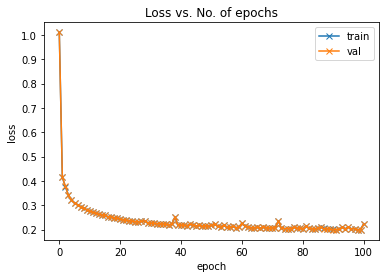

In [10]:
import matplotlib.pyplot as plt

train_losses = [float(x['epoch_loss']) for x in history_train]
val_losses = [float(x['epoch_loss']) for x in history_val]
plt.plot(train_losses, '-x', label='train')
plt.plot(val_losses, '-x', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

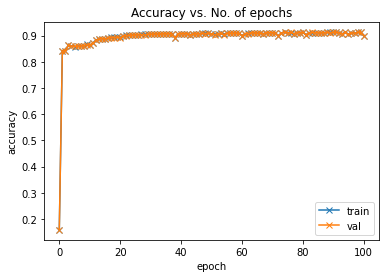

In [11]:
train_accs = [float(x['epoch_acc']) for x in history_train]
val_accs = [float(x['epoch_acc']) for x in history_val]
plt.plot(train_accs, '-x', label='train')
plt.plot(val_accs, '-x', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs. No. of epochs')

选用ReLU作为激活函数，学习速率选为0.01，迭代步数为100时：

In [24]:
x_dim         = 36      # input dimension
y_dim         = 2       # label dimension
hidden_dim    = 24      # hidden layer dimension
act_func      = F.relu  # activation function
batch_size    = 64
num_epochs    = 100
learning_rate = 0.01
device = torch.device('cuda')

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size)
# move dataloader to gpu
train_loader = DeviceDataLoader(train_loader, device)
val_loader   = DeviceDataLoader(val_loader, device)

# initialize linear regression model
logging.info("Initializing NN model.")
insurance_model = Insurance_Model(x_dim, hidden_dim, y_dim, act_func)
# move model parameters to gpu
to_device(insurance_model, device)
logging.info("Start training...")
insurance_model.train(train_loader, val_loader, num_epochs,
                      learning_rate, log_interval=10, opt_func=torch.optim.SGD)
logging.info("Training finished.")

logging.info("Save model.")
insurance_model.save_model('report01-insurance_model.pth')

03/07/2022 10:43:29 AM INFO:Initializing NN model.
03/07/2022 10:43:29 AM INFO:Start training...
03/07/2022 10:43:32 AM INFO:Train_Epoch [0], loss: 0.9338, acc: 0.1584.
03/07/2022 10:43:32 AM INFO:Val_Epoch [0], loss: 0.9337, acc: 0.1592.
03/07/2022 10:44:25 AM INFO:Train_Epoch [10], loss: 0.2281, acc: 0.9040.
03/07/2022 10:44:26 AM INFO:Val_Epoch [10], loss: 0.2285, acc: 0.9018.
03/07/2022 10:45:19 AM INFO:Train_Epoch [20], loss: 0.4112, acc: 0.8306.
03/07/2022 10:45:19 AM INFO:Val_Epoch [20], loss: 0.4156, acc: 0.8270.
03/07/2022 10:46:11 AM INFO:Train_Epoch [30], loss: 0.2760, acc: 0.8954.
03/07/2022 10:46:11 AM INFO:Val_Epoch [30], loss: 0.2749, acc: 0.8941.
03/07/2022 10:47:01 AM INFO:Train_Epoch [40], loss: 0.1933, acc: 0.9181.
03/07/2022 10:47:02 AM INFO:Val_Epoch [40], loss: 0.1944, acc: 0.9163.
03/07/2022 10:47:52 AM INFO:Train_Epoch [50], loss: 0.2034, acc: 0.9143.
03/07/2022 10:47:52 AM INFO:Val_Epoch [50], loss: 0.2034, acc: 0.9133.
03/07/2022 10:48:44 AM INFO:Train_Epoch [

训练过程中的损失函数值和准确率变化：

In [25]:
history_train = pickle.load(open('insurance_history_train.pkl', 'rb'))
history_val = pickle.load(open('insurance_history_val.pkl', 'rb'))

Text(0.5, 1.0, 'Loss vs. No. of epochs')

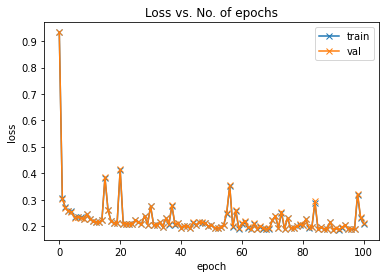

In [26]:
import matplotlib.pyplot as plt

train_losses = [float(x['epoch_loss']) for x in history_train]
val_losses = [float(x['epoch_loss']) for x in history_val]
plt.plot(train_losses, '-x', label='train')
plt.plot(val_losses, '-x', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

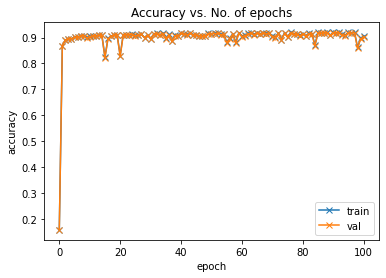

In [27]:
train_accs = [float(x['epoch_acc']) for x in history_train]
val_accs = [float(x['epoch_acc']) for x in history_val]
plt.plot(train_accs, '-x', label='train')
plt.plot(val_accs, '-x', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs. No. of epochs')

选用tanh作为激活函数，学习速率选为0.01，迭代步数为100时：

In [16]:
x_dim         = 36      # input dimension
y_dim         = 2       # label dimension
hidden_dim    = 24      # hidden layer dimension
act_func      = F.tanh  # activation function
batch_size    = 128
num_epochs    = 100
learning_rate = 0.01
device = torch.device('cuda')

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size)
# move dataloader to gpu
train_loader = DeviceDataLoader(train_loader, device)
val_loader   = DeviceDataLoader(val_loader, device)

# initialize linear regression model
logging.info("Initializing NN model.")
insurance_model = Insurance_Model(x_dim, hidden_dim, y_dim, act_func)
# move model parameters to gpu
to_device(insurance_model, device)
logging.info("Start training...")
insurance_model.train(train_loader, val_loader, num_epochs,
                      learning_rate, log_interval=10, opt_func=torch.optim.SGD)
logging.info("Training finished.")

logging.info("Save model.")
insurance_model.save_model('report01-insurance_model.pth')

03/07/2022 10:20:06 AM INFO:Initializing NN model.
03/07/2022 10:20:06 AM INFO:Start training...
c:\users\sj2050\miniconda3\lib\site-packages\torch\nn\functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
03/07/2022 10:20:08 AM INFO:Train_Epoch [0], loss: 0.7299, acc: 0.3735.
03/07/2022 10:20:08 AM INFO:Val_Epoch [0], loss: 0.7296, acc: 0.3737.
03/07/2022 10:20:45 AM INFO:Train_Epoch [10], loss: 0.2216, acc: 0.9048.
03/07/2022 10:20:45 AM INFO:Val_Epoch [10], loss: 0.2220, acc: 0.9038.
03/07/2022 10:21:23 AM INFO:Train_Epoch [20], loss: 0.2235, acc: 0.9028.
03/07/2022 10:21:23 AM INFO:Val_Epoch [20], loss: 0.2231, acc: 0.9029.
03/07/2022 10:22:00 AM INFO:Train_Epoch [30], loss: 0.2048, acc: 0.9060.
03/07/2022 10:22:00 AM INFO:Val_Epoch [30], loss: 0.2037, acc: 0.9056.
03/07/2022 10:22:39 AM INFO:Train_Epoch [40], loss: 0.2216, acc: 0.9017.
03/07/2022 10:22:39 AM INFO:Val_Ep

训练过程中的损失函数值和准确率变化：

In [17]:
history_train = pickle.load(open('insurance_history_train.pkl', 'rb'))
history_val = pickle.load(open('insurance_history_val.pkl', 'rb'))

Text(0.5, 1.0, 'Loss vs. No. of epochs')

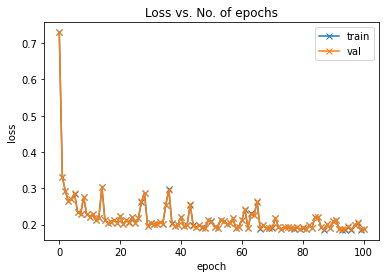

In [18]:
import matplotlib.pyplot as plt

train_losses = [float(x['epoch_loss']) for x in history_train]
val_losses = [float(x['epoch_loss']) for x in history_val]
plt.plot(train_losses, '-x', label='train')
plt.plot(val_losses, '-x', label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss vs. No. of epochs')

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

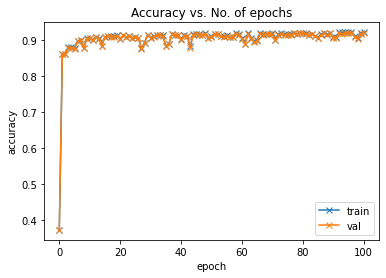

In [19]:
train_accs = [float(x['epoch_acc']) for x in history_train]
val_accs = [float(x['epoch_acc']) for x in history_val]
plt.plot(train_accs, '-x', label='train')
plt.plot(val_accs, '-x', label='val')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy vs. No. of epochs')

可以看到，选用tanh激活函数的模型最终训练出来的精度最佳，在验证集上可以达到91.84%的准确度。

## 5. 小结

&ensp;&ensp;&ensp;&ensp;在本次任务中，我们使用了全连接神经网络进行了交通事故理赔审核预测。这是我第一次使用Pytorch进行实战开发，在开发中遇到了不少问题，例如从训练样本文件中读入输入值和标签值时，需考虑读入的类型，例如标签label需要为整型，如果类型不当，Pytorch将会爆出RuntimeError: expected scalar type Long but found Float的错误。如果需要使用gpu加速计算，需要安装对应的显卡驱动，并且gpu版的Pytorch和普通版本的Pytorch并不一致，需要卸载掉原有的Pytorch再重新安装gpu版的Pytorch才能使用到gpu加速功能。同时，在开发中，也感受到了Pytorch的魅力，其所有操纵都十分简洁，但功能齐全，与平时作业手写神经网络相比，大大提升了开发效率。此外，在该任务中，我们还测试了不同的激活函数下的训练精度和效果，结果发现tanh激活函数取得效果最好。